In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import pathlib 

In [2]:
DATA_CSV = pathlib.Path("../data/processed/metadata.csv")
AUDIO_ROOT = pathlib.Path("../")

In [3]:
data = pd.read_csv(DATA_CSV)
print("Rows:", len(data))
print(data.head())

Rows: 10322
                                            filepath  emotion
0  data/raw/crema_d/AudioWAV/crema_d_1001_dfa_ang...    angry
1  data/raw/crema_d/AudioWAV/crema_d_1001_dfa_dis...  disgust
2  data/raw/crema_d/AudioWAV/crema_d_1001_dfa_fea...  fearful
3  data/raw/crema_d/AudioWAV/crema_d_1001_dfa_hap...    happy
4  data/raw/crema_d/AudioWAV/crema_d_1001_dfa_neu...  neutral


<Axes: xlabel='count', ylabel='emotion'>

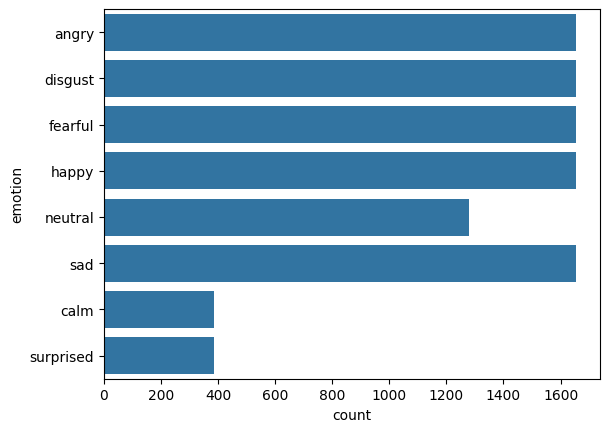

In [4]:
sns.countplot(data['emotion'])